
# 5.2 API Tutorial of Alpha/Beta Rhythms

This example demonstrates how to simulate alpha and beta frequency
activity in the alpha/beta complex of the SI mu-rhythm [1]_,
as detailed in the [HNN GUI alpha and beta tutorial](https://jonescompneurolab.github.io/hnn-tutorials/alpha_and_beta/alpha_and_beta),
using HNN-Core.

We recommend you first review the GUI tutorial. The workflow below recreates
the alpha only rhythm, similar to Figure 5 of the GUI tutorial, and the
alpha/beta complex similar to Figure 20 in the GUI tutorial, albeit without
visualization of the corresponding time-frequency spectrograms [1]_.


In [1]:
# Authors: Mainak Jas <mjas@mgh.harvard.edu>
#          Sam Neymotin <samnemo@gmail.com>
#          Nick Tolley <nicholas_tolley@brown.edu>
#          Christopher Bailey <bailey.cj@gmail.com>

import os.path as op

Let us import hnn_core



In [2]:
import hnn_core
from hnn_core import simulate_dipole, jones_2009_model

--No graphics will be displayed.


Now let's simulate the dipole and plot it. To excite the network, we add a
~10 Hz "bursty" drive starting at 50 ms and continuing to the end of the
simulation. Each burst consists of a pair (2) of spikes, spaced 10 ms apart.
The occurrence of each burst is jittered by a random, normally distributed
amount (20 ms standard deviation). We repeat the burst train 10 times, each
time with unique randomization. The drive is only connected to the 
:term:`proximal` (dendritic) AMPA synapses on L2/3 and L5 pyramidal neurons.



In [3]:
net = jones_2009_model()

location = 'proximal'
burst_std = 20
weights_ampa_p = {'L2_pyramidal': 5.4e-5, 'L5_pyramidal': 5.4e-5}
syn_delays_p = {'L2_pyramidal': 0.1, 'L5_pyramidal': 1.}

net.add_bursty_drive(
    'alpha_prox', tstart=50., burst_rate=10, burst_std=burst_std, numspikes=2,
    spike_isi=10, n_drive_cells=10, location=location,
    weights_ampa=weights_ampa_p, synaptic_delays=syn_delays_p, event_seed=284)

# simulate the dipole, but do not automatically scale or smooth the result
dpl = simulate_dipole(net, tstop=310., n_trials=1)

trial_idx = 0  # single trial simulated, choose the first index
# to emulate a larger patch of cortex, we can apply a simple scaling factor
dpl[trial_idx].scale(3000)

Joblib will run 1 trial(s) in parallel by distributing trials over 1 jobs.
Loading custom mechanism files from /opt/homebrew/Caskroom/miniconda/base/envs/textbook-dev-build/lib/python3.12/site-packages/hnn_core/mod/arm64/.libs/libnrnmech.so
Building the NEURON model
[Done]
Trial 1: 0.03 ms...
Trial 1: 10.0 ms...
Trial 1: 20.0 ms...
Trial 1: 30.0 ms...
Trial 1: 40.0 ms...
Trial 1: 50.0 ms...
Trial 1: 60.0 ms...
Trial 1: 70.0 ms...
Trial 1: 80.0 ms...
Trial 1: 90.0 ms...
Trial 1: 100.0 ms...
Trial 1: 110.0 ms...
Trial 1: 120.0 ms...
Trial 1: 130.0 ms...
Trial 1: 140.0 ms...
Trial 1: 150.0 ms...
Trial 1: 160.0 ms...
Trial 1: 170.0 ms...
Trial 1: 180.0 ms...
Trial 1: 190.0 ms...
Trial 1: 200.0 ms...
Trial 1: 210.0 ms...
Trial 1: 220.0 ms...
Trial 1: 230.0 ms...
Trial 1: 240.0 ms...
Trial 1: 250.0 ms...
Trial 1: 260.0 ms...
Trial 1: 270.0 ms...
Trial 1: 280.0 ms...
Trial 1: 290.0 ms...
Trial 1: 300.0 ms...


Prior to plotting, we can choose to smooth the dipole waveform (note that the
:meth:`~hnn_core.dipole.smooth`-method operates in-place, *i.e.*, it alters
the data inside the ``Dipole`` object). Smoothing approximates the effect of
signal summation from a larger number and greater volume of neurons than are
included in our biophysical model. We can confirm that what we simulate is
indeed 10 Hz activity by plotting the power spectral density (PSD).



/var/folders/j9/rnclgw5s2kn7l6wt55q4gv7c0000gp/T/ipykernel_9003/861980954.py:19: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


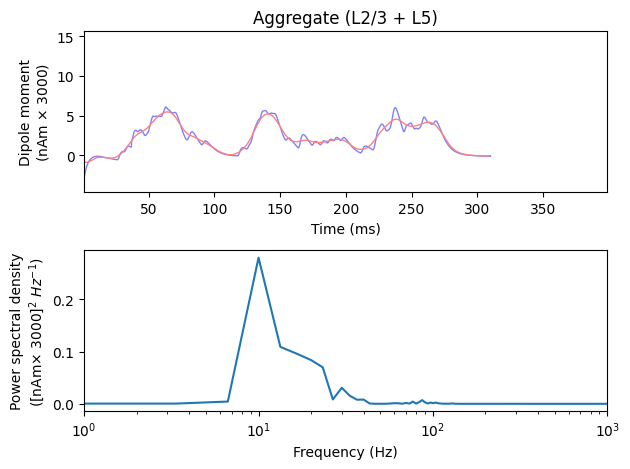

In [4]:
import matplotlib.pyplot as plt
from hnn_core.viz import plot_dipole, plot_psd

fig, axes = plt.subplots(2, 1, constrained_layout=True)
tmin, tmax = 10, 300  # exclude the initial burn-in period from the plots

# We'll make a copy of the dipole before smoothing in order to compare
window_len = 20  # convolve with a 20 ms-long Hamming window
dpl_smooth = dpl[trial_idx].copy().smooth(window_len)

# Overlay the traces for comparison. The function plot_dipole can plot a list
# of dipoles at once
dpl[trial_idx].plot(tmin=tmin, tmax=tmax, color='b', ax=axes[0], show=False)
dpl_smooth.plot(tmin=tmin, tmax=tmax, color='r', ax=axes[0], show=False)
axes[0].set_xlim((1, 399))

plot_psd(dpl[trial_idx], fmin=1., fmax=1e3, tmin=tmin, ax=axes[1], show=False)
axes[1].set_xscale('log')
plt.tight_layout()
plt.show()

The next step is to add a simultaneous 10 Hz :term:`distal` drive with a
lower within-burst spread of spike times (``burst_std``) compared with the
proximal one. The different arrival times of spikes at opposite ends of
the pyramidal cells will tend to produce bursts of 15-30 Hz power known
as beta frequency events.



In [5]:
location = 'distal'
burst_std = 15
weights_ampa_d = {'L2_pyramidal': 5.4e-5, 'L5_pyramidal': 5.4e-5}
syn_delays_d = {'L2_pyramidal': 5., 'L5_pyramidal': 5.}
net.add_bursty_drive(
    'alpha_dist', tstart=50., burst_rate=10, burst_std=burst_std, numspikes=2,
    spike_isi=10, n_drive_cells=10, location=location,
    weights_ampa=weights_ampa_d, synaptic_delays=syn_delays_d, event_seed=296)
dpl = simulate_dipole(net, tstop=310., n_trials=1)

Joblib will run 1 trial(s) in parallel by distributing trials over 1 jobs.
Building the NEURON model
[Done]
Trial 1: 0.03 ms...
Trial 1: 10.0 ms...
Trial 1: 20.0 ms...
Trial 1: 30.0 ms...
Trial 1: 40.0 ms...
Trial 1: 50.0 ms...
Trial 1: 60.0 ms...
Trial 1: 70.0 ms...
Trial 1: 80.0 ms...
Trial 1: 90.0 ms...
Trial 1: 100.0 ms...
Trial 1: 110.0 ms...
Trial 1: 120.0 ms...
Trial 1: 130.0 ms...
Trial 1: 140.0 ms...
Trial 1: 150.0 ms...
Trial 1: 160.0 ms...
Trial 1: 170.0 ms...
Trial 1: 180.0 ms...
Trial 1: 190.0 ms...
Trial 1: 200.0 ms...
Trial 1: 210.0 ms...
Trial 1: 220.0 ms...
Trial 1: 230.0 ms...
Trial 1: 240.0 ms...
Trial 1: 250.0 ms...
Trial 1: 260.0 ms...
Trial 1: 270.0 ms...
Trial 1: 280.0 ms...
Trial 1: 290.0 ms...
Trial 1: 300.0 ms...


We can verify that beta frequency activity was produced by inspecting the PSD
of the most recent simulation. The dominant power in the signal is shifted
from alpha (~10 Hz) to beta (15-25 Hz) frequency range. All plotting and
smoothing parameters are as above, but here no scaling is applied, leading to
smaller absolute values in the plots.



/var/folders/j9/rnclgw5s2kn7l6wt55q4gv7c0000gp/T/ipykernel_9003/1762908852.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


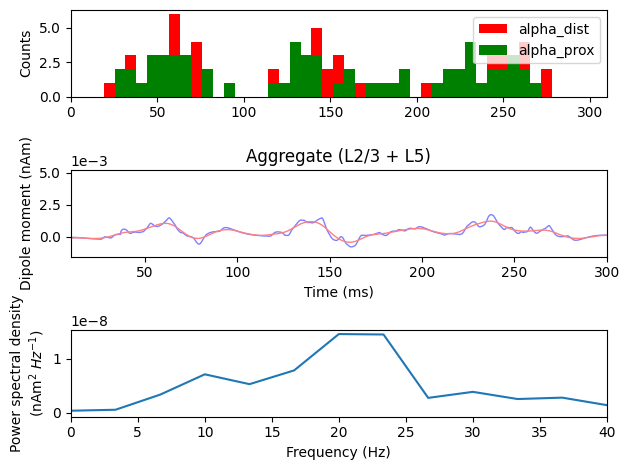

In [6]:
fig, axes = plt.subplots(3, 1, constrained_layout=True)

net.cell_response.plot_spikes_hist(ax=axes[0], show=False)

# We'll again make a copy of the dipole before smoothing
smooth_dpl = dpl[trial_idx].copy().smooth(window_len)

# Note that using the ``plot_*``-functions are available as ``Dipole``-methods:
dpl[trial_idx].plot(tmin=tmin, tmax=tmax, ax=axes[1], color='b', show=False)
smooth_dpl.plot(tmin=tmin, tmax=tmax, ax=axes[1], color='r', show=False)

dpl[trial_idx].plot_psd(fmin=0., fmax=40., tmin=tmin, ax=axes[2], show=False)
plt.tight_layout()
plt.show()

## References

[1] Jones, S. R. et al. Quantitative analysis and biophysically realistic neural modeling of the MEG mu rhythm: rhythmogenesis and modulation of sensory-evoked responses. J. Neurophysiol. 102, 3554–3572 (2009).

